In [27]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [21]:
quandl.ApiConfig.api_key = '2AP-mzHnGiD3YU6d9mzy'

In [33]:
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,MSFT,2016-12-30,60.788710
1,MSFT,2016-12-29,61.532183
2,MSFT,2016-12-28,61.620226
3,MSFT,2016-12-27,61.903920
4,MSFT,2016-12-23,61.864790


In [34]:
new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')

# check the head of the output
clean_data.head()

adj_close           
ticker            AAPL       MSFT
date                             
2015-12-31  101.696810  52.829107
2016-01-04  101.783763  52.181598
2016-01-05   99.233131  52.419653
2016-01-06   97.291172  51.467434
2016-01-07   93.185040  49.677262

In [42]:
data = quandl.get("NSE/HDFCBANK", authtoken="2AP-mzHnGiD3YU6d9mzy")
data.head(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-20,70.00,75.40,70.00,NaN,NaN,NaN,NaN
1998-03-23,74.95,74.95,72.50,73.05,73.05,26700.0,19.60
1998-03-24,75.95,76.00,72.75,73.50,73.25,374200.0,277.32


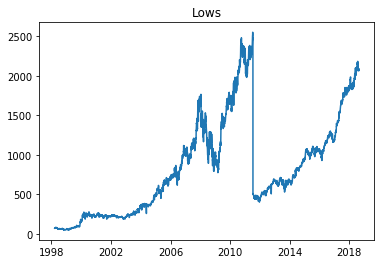

In [43]:
plt.plot(data['Low'])
plt.title('Lows')
plt.show()

/home/chetan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

/home/chetan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



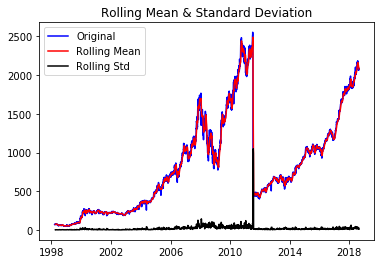

In [44]:
rollmean = pd.rolling_mean(data['Low'], window=12)
rollstd = pd.rolling_std(data['Low'], window=12)
plt.plot(data['Low'], color='blue',label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

***TIME SERIES DATA WHICH WILL BE USED WITH STACKED AUTOENCODERS***

In [50]:
ts_hdfc = quandl.get("NSE/HDFCBANK", authtoken="2AP-mzHnGiD3YU6d9mzy")
ts_icici = quandl.get("NSE/ICICIBANK", authtoken="2AP-mzHnGiD3YU6d9mzy")

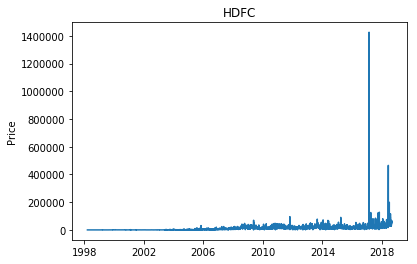

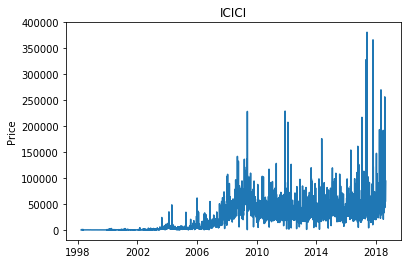

In [54]:
plt.plot(ts_hdfc['Turnover (Lacs)'])
plt.title('HDFC')
plt.ylabel('Price');
plt.show()

plt.plot(ts_icici['Turnover (Lacs)'])
plt.title('ICICI')
plt.ylabel('Price');
plt.show();